### Libraries

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

### Import Data

In [2]:
with open('content.json') as content:
    data = json.load(content)

In [3]:
tags = []
inputs = []
responses = {}
for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [4]:
data = pd.DataFrame({'inputs': inputs,
                     'tags': tags})

In [5]:
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this the Kushagra's India Fighting Cham...",greeting
4,any recruiter here ?,greeting
...,...,...
76,tell me more about the pre requisites,prerequisites
77,give more details about the pre-requisites,prerequisites
78,What are the requirements,prerequisites
79,what's the basic requirements,prerequisites


### PreProcessing

In [6]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,hi is this the kushagras india fighting champi...,greeting
4,any recruiter here,greeting
...,...,...
76,tell me more about the pre requisites,prerequisites
77,give more details about the prerequisites,prerequisites
78,what are the requirements,prerequisites
79,whats the basic requirements,prerequisites


In [11]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

from tensorflow.keras.utils import pad_sequences
x_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [12]:
input_shape = x_train.shape[1]
input_shape

8

In [13]:
vocabulary = len(tokenizer.word_index)
print('Number of unique words: ',vocabulary)
output_length = le.classes_.shape[0]
print('Output Lenght: ', output_length)

Number of unique words:  98
Output Lenght:  8


### Model

In [15]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary + 1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation='softmax')(x)
model = Model(i, x)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 7ms/step - loss: 2.0776 - accuracy: 0.1852
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0735 - accuracy: 0.1975
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0698 - accuracy: 0.1975
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0664 - accuracy: 0.2099
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0622 - accuracy: 0.2099
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0583 - accuracy: 0.2099
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0541 - accuracy: 0.2222
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0495 - accuracy: 0.2346
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0440 - accuracy: 0.2222
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0381 - accuracy: 0.2346
Epoch 11/200
3/3 [===========

3/3 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.8765
Epoch 85/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.8642
Epoch 86/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6024 - accuracy: 0.8642
Epoch 87/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.8642
Epoch 88/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.8765
Epoch 89/200
3/3 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.8765
Epoch 90/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.8765
Epoch 91/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.8765
Epoch 92/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5448 - accuracy: 0.8765
Epoch 93/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.8765
Epoch 94/200
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1563 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1539 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1520 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1499 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1433 - accuracy: 1.0000
Epoch 177/200
3/3 [=====

### Model Summary

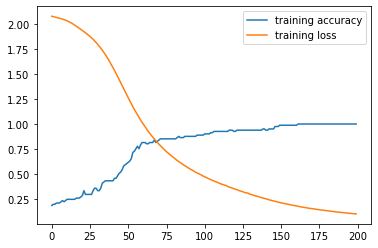

In [17]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.legend()
plt.show()

### Testing

In [18]:
import random

while True:
    texts_pred = []
    prediction_input = input('You: ')
    
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_pred.append(prediction_input)
    
    prediction_input = tokenizer.texts_to_sequences(texts_pred)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    
    output = model.predict(prediction_input)
    output = output.argmax()
    
    response_tag = le.inverse_transform([output])[0]
    print('KIFC Bot: ', random.choice(responses[response_tag]))
    if response_tag == 'goodbye':
        break

You: hi there
1/1 [==============================] - 1s 582ms/step
KIFC Bot:  Hello my friend, How can I help you ?
You: how do i join KIFC
1/1 [==============================] - 0s 18ms/step
KIFC Bot:  well. there are some pre-requisite and after you complete them, find the performance centers of KIFC
You: where are the KIFC centres
1/1 [==============================] - 0s 18ms/step
KIFC Bot:  I live in India. Pretty sure you have heard about it
You: thank you good bye
1/1 [==============================] - 0s 18ms/step
KIFC Bot:  Adios
